In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("BIKE DETAILS.csv")

In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [ ]:
# What is the range of selling prices in the dataset?

Range = df['selling_price'].max() - df['selling_price'].min()
Range

755000

In [ ]:
# What is the median selling price for bikes in the dataset?
df["selling_price"].median()

45000.0

In [ ]:
# What is the most common seller type?
most_common_seller_type = df["seller_type"].mode()[0]
# mode is use to check the most frequent value

In [ ]:
# How many bikes have driven more than 50,000 kilometers ?
len(df[df["km_driven"] > 50000])

170

In [ ]:
# What is the average km_driven value for each ownership type?
df.groupby(["owner"])["km_driven"].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [ ]:
# What proportion of bikes are from the year 2015 or older?
(len(df[df["year"] >= 2015]) / len(df))*100

52.780395852968894

In [ ]:
#  What is the trend of missing values across the datasetD
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [ ]:
# What is the highest ex_showroom_price recorded, and for which bike?
df[df["ex_showroom_price"] == df["ex_showroom_price"].max()]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


In [ ]:
# What is the total number of bikes listed by each seller typeD
df.groupby(["seller_type"])["name"].count()

,name
seller_type,
Dealer,6
Individual,1055


In [ ]:
df.groupby(["selling_price"])["km_driven"].count().sort_values(ascending=False)

,km_driven
selling_price,
25000,77
35000,66
40000,63
50000,63
30000,62
...,...
47999,1
39000,1
36999,1


In [ ]:
#  Identify and remove outliers in the km_driven column using the IQR methodB
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1
IQR

29500.0

<Axes: xlabel='year'>

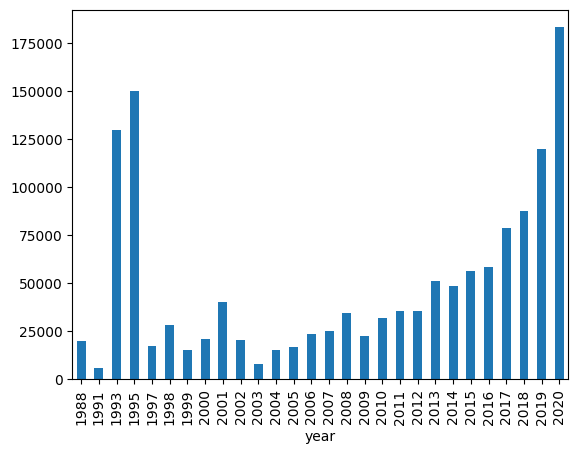

In [ ]:
# Perform a bivariate analysis to visualize the relationship between year and selling_priceB
df.groupby(["year"])["selling_price"].mean().plot(kind="bar")

In [ ]:
# What is the average depreciation in selling price based on the bike's age (current year - manufacturing YEAR ?
df["depreciation"] = df["selling_price"] - df["ex_showroom_price"]
df["depreciation"].mean()

-28513.549520766774

In [ ]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,depreciation
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,1886.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,-24643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,NaN
...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0,-35000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0,-35000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0,-42000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0,-46000.0


In [ ]:
# Which bike names are priced significantly above the average price for their manufacturing year?
avg_price = df.groupby('year')['selling_price'].mean().reset_index()
avg_price.rename(columns={'selling_price':'avg_selling_price'}, inplace=True)


df_bike = pd.merge(df, avg_price, on='year')
df_bike[df['selling_price']>df_bike['avg_selling_price']]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,depreciation,avg_selling_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,NaN,119689.511628
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,1886.0,87660.374046
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,-24643.0,56500.000000
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN,NaN,34289.285714
13,Yamaha YZF R3,365000,2019,Individual,1st owner,1127,351680.0,13320.0,119689.511628
...,...,...,...,...,...,...,...,...,...
1004,Bajaj Pulsar NS 200,60000,2016,Individual,1st owner,25000,99000.0,-39000.0,58469.018692
1005,TVS Apache RTR 160,60000,2014,Individual,1st owner,19000,81000.0,-21000.0,48668.131868
1008,Bajaj Pulsar 220 F,52000,2012,Individual,1st owner,45000,94000.0,-42000.0,35748.400000
1012,Bajaj Pulsar NS 200,50000,2014,Individual,1st owner,13000,99000.0,-49000.0,48668.131868


Text(0.5, 1.0, 'Correlation Matrix')

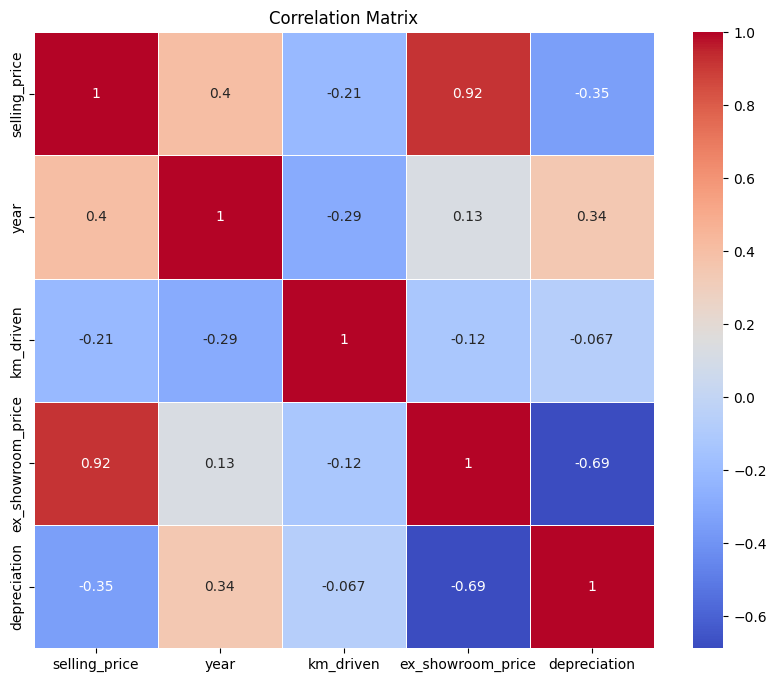

In [ ]:
#  Develop a correlation matrix for numeric columns and visualize it using a heatmap.

numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()
corr_matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

# **EDA car sales analysis**

In [ ]:
# 1.) What is the average selling price of cars for each dealer, and how does it compare across different dealers?
# 2.) Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends ?
# 3.)  What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare
# 4.) What is the distribution of car prices across different regions?
# 5.) What is the distribution of cars based on body styles?
# 6.) How does the average selling price of cars vary by customer gender and annual income?
# 7.) What is the distribution of car prices by region, and how does the number of cars sold vary by region?
# 8.) How does the average car price differ between cars with different engine sizes?
# 9.) How do car prices vary based on the customer’s annual income bracket?
# 10.) What are the top 5 car models with the highest number of sales, and how does their price distribution lookE
# 11.) How does car price vary with engine size across different car colors, and which colors have the highest price variation?
# 12.) Is there any seasonal trend in car sales based on the date of saleE
# 13.)  How does the car price distribution change when considering different combinations of body style and transmission type?
# 14.)  What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
# 15.) How does the average car price vary across different car models and engine types?

In [ ]:
df = pd.read_csv("car_sales.csv")

In [ ]:
# Question.1) What is the average selling price of cars for each dealer, and how does it compare across different dealers?


In [ ]:
# Calculate the average selling price of cars for each dealer
average_prices = df.groupby('Dealer_Name')['Price ($)'].mean().reset_index()
average_prices.columns = ['Dealer_Name', 'Average_Price']
average_prices = average_prices.sort_values(by='Average_Price', ascending=False)
average_prices



,Dealer_Name,Average_Price
27,U-Haul CO,28769.919006
5,Classic Chevy,28602.014446
19,Rabun Used Car Sales,28527.536177
11,Iceberg Rentals,28522.958533
8,Enterprise Rent A Car,28312.580800
23,Scrivener Performance Engineering,28297.371589
9,Gartner Buick Hyundai Saab,28247.621019
22,Saab-Belle Dodge,28190.139888
2,Capitol KIA,28189.703822
20,Race Car Help,28163.372706


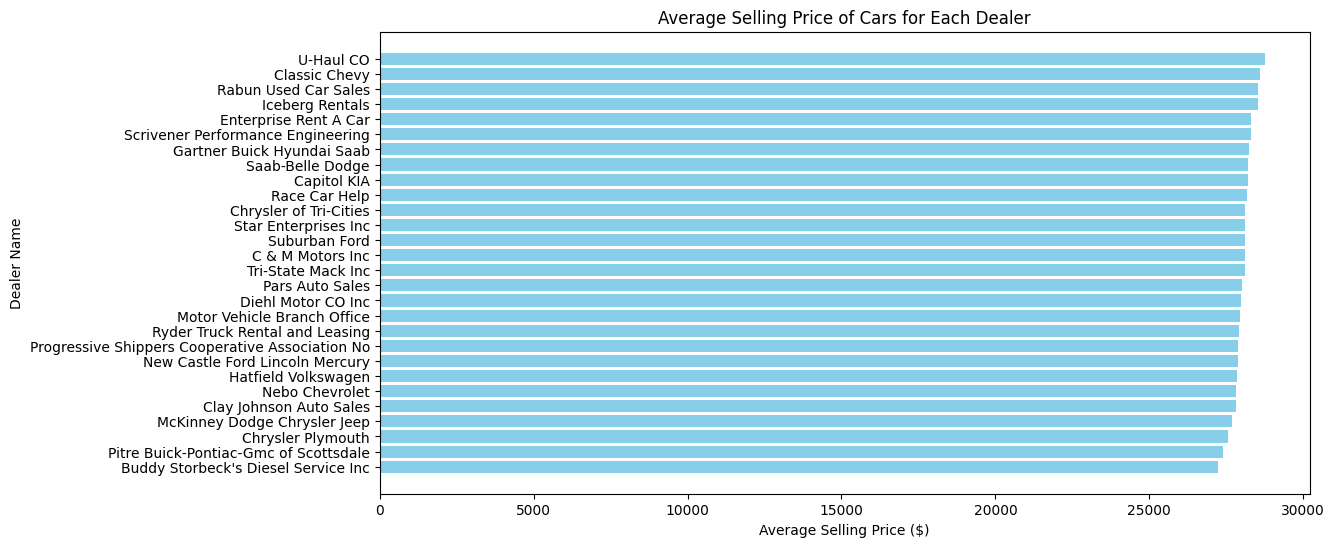

In [ ]:
# Compare it with barplot
plt.figure(figsize=(12,6))
plt.barh(average_prices['Dealer_Name'], average_prices['Average_Price'], color='skyblue')
plt.xlabel('Average Selling Price ($)')
plt.ylabel('Dealer Name')
plt.title('Average Selling Price of Cars for Each Dealer')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest average price on top
plt.show()

In [ ]:
# 2.) Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends ?

In [ ]:
price_variation = df.groupby('Company')['Price ($)'].std().reset_index()
price_variation.columns = ['Company', 'Price_Standard_Deviation']
price_variation = price_variation.sort_values(by='Price_Standard_Deviation', ascending=False)
price_variation

,Company,Price_Standard_Deviation
15,Lincoln,19658.050211
24,Saab,19653.740089
4,Cadillac,19517.120220
21,Plymouth,19065.997338
14,Lexus,17852.923492
3,Buick,17142.232626
17,Mercury,16445.172195
19,Nissan,16214.264017
25,Saturn,15990.223671
8,Ford,15849.090227


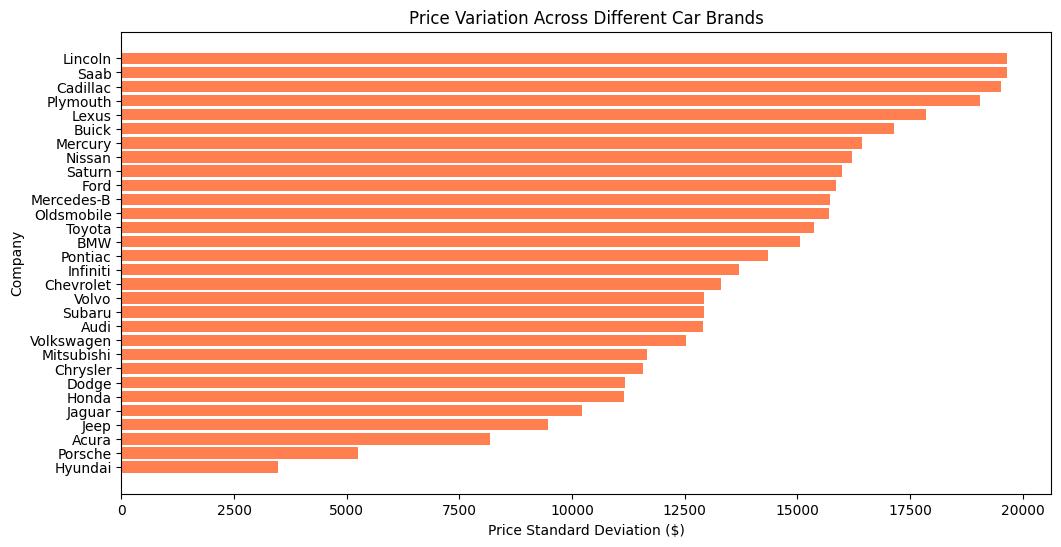

In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(price_variation['Company'], price_variation['Price_Standard_Deviation'], color='coral')
plt.xlabel('Price Standard Deviation ($)')
plt.ylabel('Company')
plt.title('Price Variation Across Different Car Brands')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest variation on top
plt.show()

In [ ]:
# 3.) What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare ?
summary_stats = df.groupby('Transmission')['Price ($)'].describe()
print("\nSummary statistics for car prices grouped by transmission type:")
print(summary_stats)


Summary statistics for car prices grouped by transmission type:
                count          mean           std     min      25%      50%  \
Transmission                                                                  
Auto          12571.0  28248.525972  13747.070597  1200.0  19000.0  24000.0   
Manual        11335.0  27914.710631  15862.871978  1700.0  17000.0  22001.0   

                  75%      max  
Transmission                    
Auto          35500.0  75700.0  
Manual        34000.0  85800.0  


In [ ]:
iqr = df.groupby('Transmission')['Price ($)'].agg(lambda x: x.quantile(0.75) - x.quantile(0.25)).reset_index()
iqr.columns = ['Transmission', 'Interquartile_Range']
print("\nInterquartile range (IQR) for car prices for each transmission type:")
print(iqr)


Interquartile range (IQR) for car prices for each transmission type:
  Transmission  Interquartile_Range
0         Auto              16500.0
1       Manual              17000.0


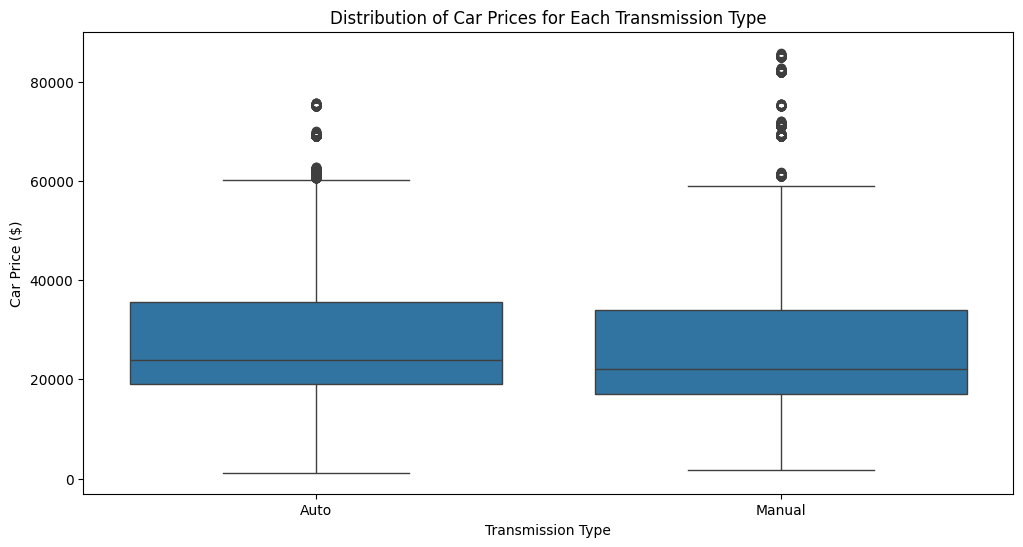

In [ ]:
# Visualize the distribution using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.xlabel('Transmission Type')
plt.ylabel('Car Price ($)')
plt.title('Distribution of Car Prices for Each Transmission Type')
plt.show()

In [ ]:
# 4.) What is the distribution of car prices across different regions?

In [ ]:
summary_stats = df.groupby('Dealer_Region')['Price ($)'].describe()
summary_stats

,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


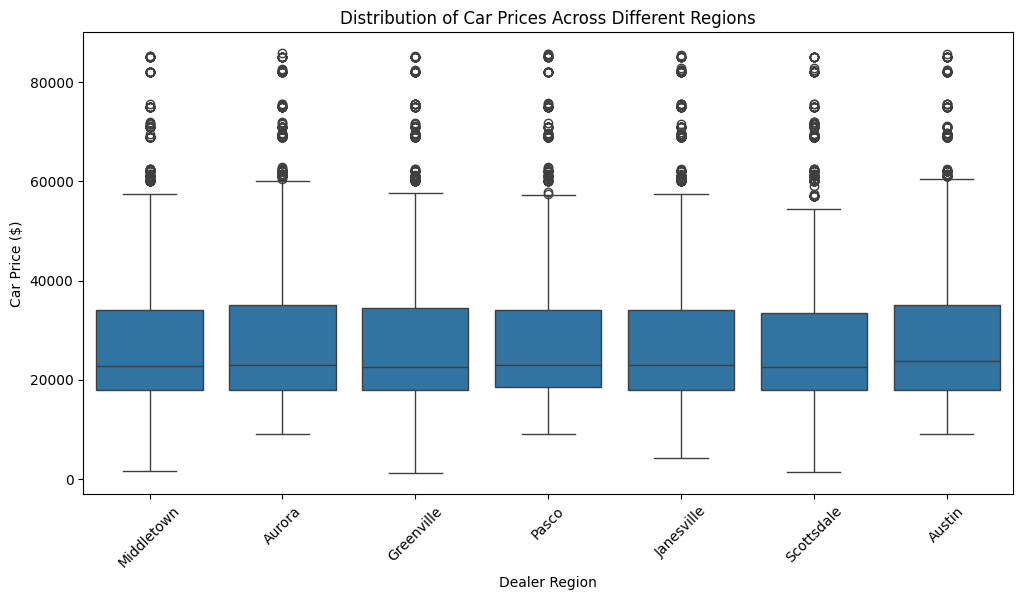

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.xlabel('Dealer Region')
plt.ylabel('Car Price ($)')
plt.title('Distribution of Car Prices Across Different Regions')
plt.xticks(rotation=45)
plt.show()

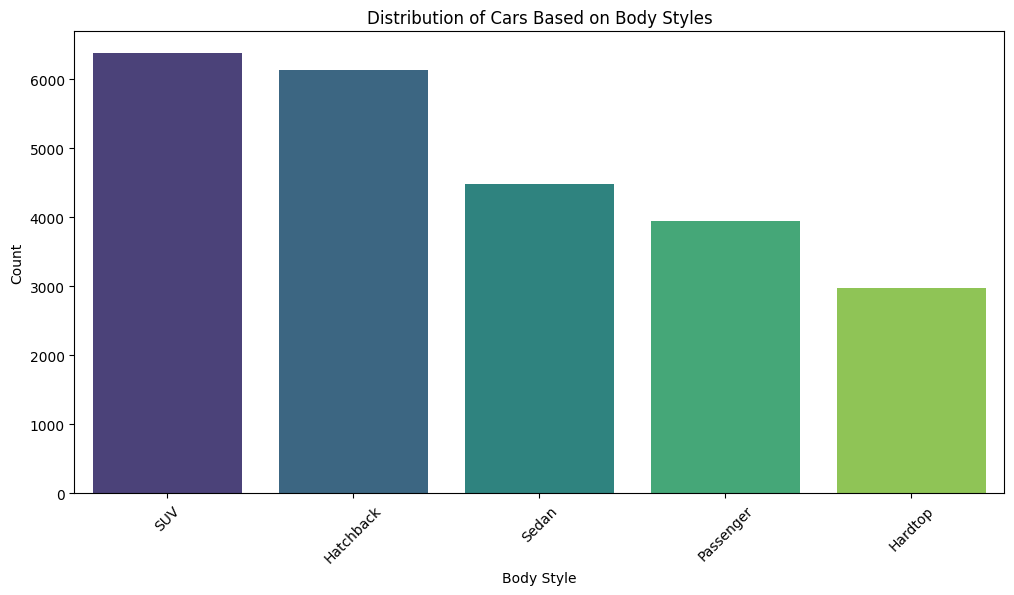

In [ ]:
# 5.) What is the distribution of cars based on body styles?
df.head(3)

body_style_counts = df['Body Style'].value_counts().reset_index()
body_style_counts.columns = ['Body Style', 'Count']
body_style_counts.columns

plt.figure(figsize=(12, 6))
sns.barplot(x='Body Style', y='Count', data=body_style_counts, palette='viridis')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.title('Distribution of Cars Based on Body Styles')
plt.xticks(rotation=45)
plt.show()


Average selling price of cars by income bin and gender:
            Income_Bin  Gender  Average_Price
0           (0, 50000]  Female   28132.038732
1           (0, 50000]    Male   27816.302247
2      (50000, 100000]  Female            NaN
3      (50000, 100000]    Male   43000.000000
4     (100000, 150000]  Female   33000.500000
5     (100000, 150000]    Male   16666.666667
6     (150000, 200000]  Female   19001.000000
7     (150000, 200000]    Male   23055.888889
8     (200000, 250000]  Female   37333.666667
9     (200000, 250000]    Male   31407.592593
10    (250000, 300000]  Female   21677.457143
11    (250000, 300000]    Male   30773.048544
12    (300000, 350000]  Female   27466.485294
13    (300000, 350000]    Male   28037.779570
14    (350000, 400000]  Female   29889.768000
15    (350000, 400000]    Male   29270.044068
16    (400000, 450000]  Female   29160.013423
17    (400000, 450000]    Male   27313.656036
18    (450000, 500000]  Female   28938.009662
19    (450000, 500000] 

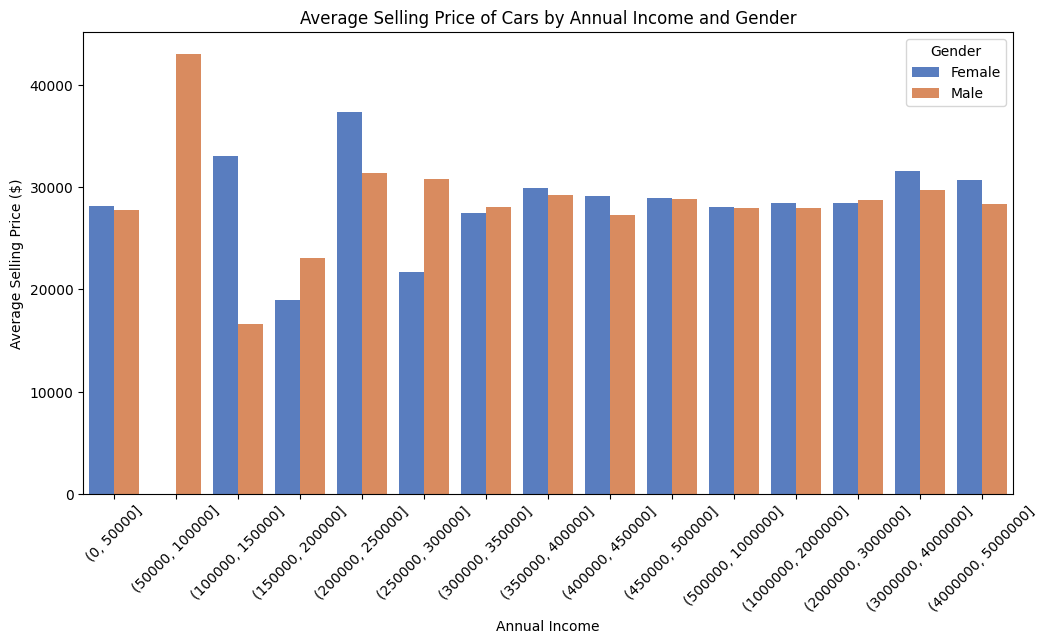

In [ ]:
# 6.) How does the average selling price of cars vary by customer gender and annual income?

income_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 1000000, 2000000, 3000000, 4000000, 5000000]
df['Income_Bin'] = pd.cut(df['Annual Income'], bins=income_bins)

# Calculate the average selling price by income bin and gender
average_price_by_income_gender = df.groupby(['Income_Bin', 'Gender'])['Price ($)'].mean().reset_index()
average_price_by_income_gender.columns = ['Income_Bin', 'Gender', 'Average_Price']

# Display the average selling price by income bin and gender
print("\nAverage selling price of cars by income bin and gender:")
print(average_price_by_income_gender)

# Visualize the average selling price by income bin and gender using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Income_Bin', y='Average_Price', hue='Gender', data=average_price_by_income_gender, palette='muted')
plt.xlabel('Annual Income')
plt.ylabel('Average Selling Price ($)')
plt.title('Average Selling Price of Cars by Annual Income and Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()




In [ ]:
# 7.)What is the distribution of car prices by region, and how does the number of cars sold vary by region?

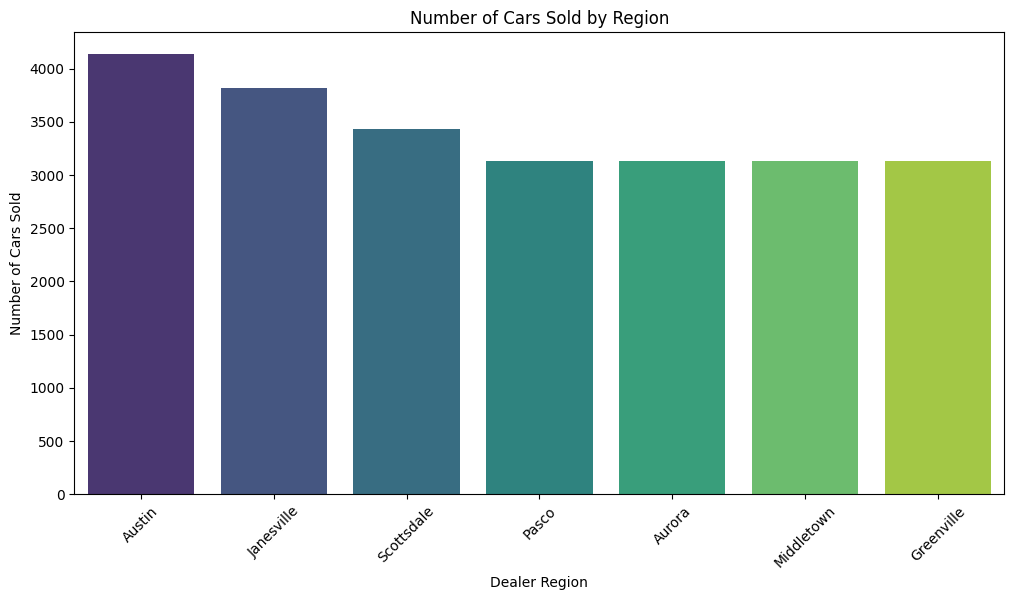

In [ ]:
summary_stats_by_region = df.groupby('Dealer_Region')['Price ($)'].describe()

cars_sold_by_region = df['Dealer_Region'].value_counts().reset_index()
cars_sold_by_region.columns = ['Dealer_Region', 'Count']
plt.figure(figsize=(12, 6))
sns.barplot(x='Dealer_Region', y='Count', data=cars_sold_by_region, palette='viridis')
plt.xlabel('Dealer Region')
plt.ylabel('Number of Cars Sold')
plt.title('Number of Cars Sold by Region')
plt.xticks(rotation=45)
plt.show()

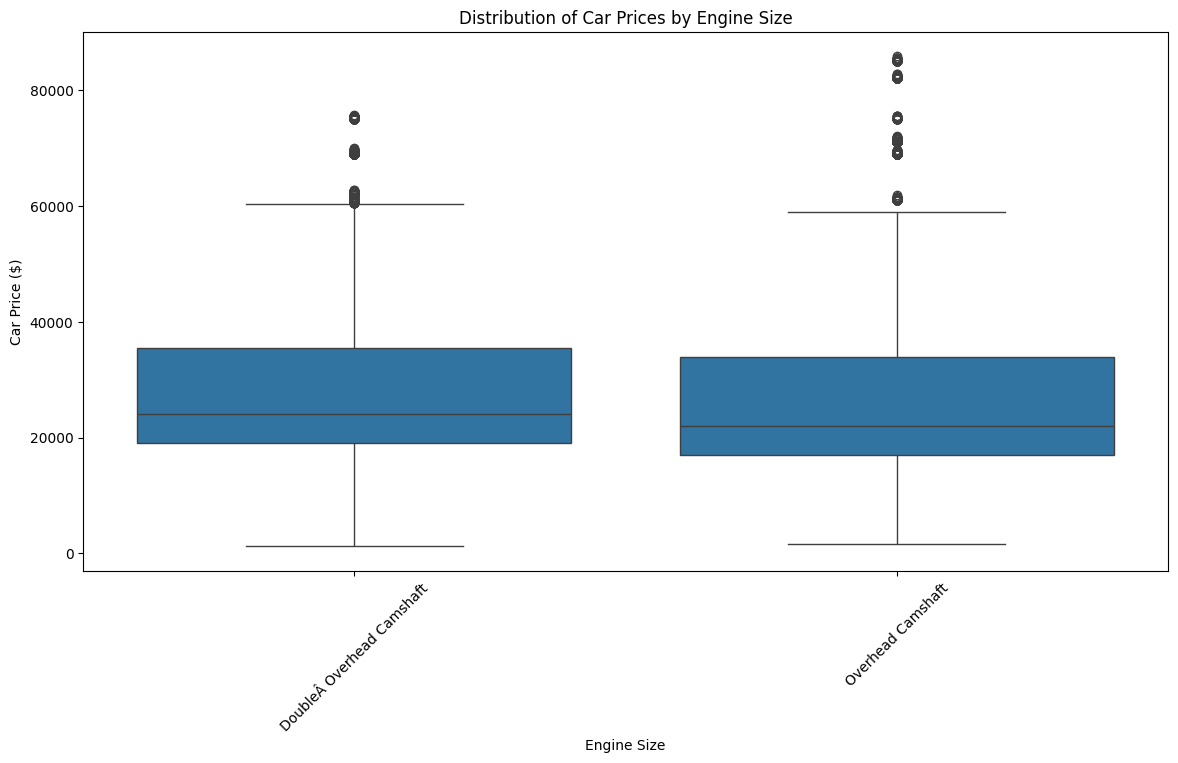

In [ ]:
# 8.) How does the average car price differ between cars with different engine sizes?

average_price_by_engine = df.groupby('Engine')['Price ($)'].mean().reset_index()
average_price_by_engine.columns = ['Engine', 'Average_Price']

plt.figure(figsize=(14, 7))
sns.boxplot(x='Engine', y='Price ($)', data=df)
plt.xlabel('Engine Size')
plt.ylabel('Car Price ($)')
plt.title('Distribution of Car Prices by Engine Size')
plt.xticks(rotation=45)
plt.show()

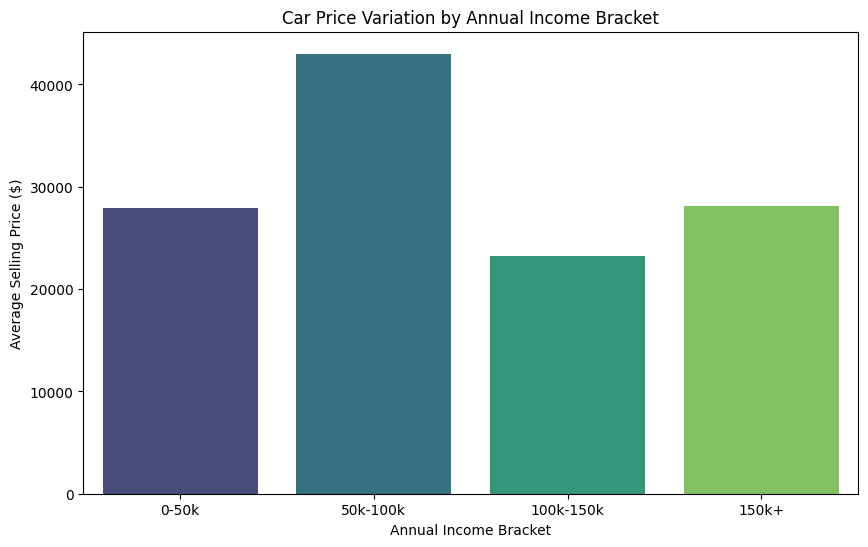

In [ ]:
# 9.) How do car prices vary based on the customer’s annual income bracket
# Define income brackets (you can customize these)
income_brackets = [0, 50000, 100000, 150000, float('inf')]  # Example brackets
income_labels = ['0-50k', '50k-100k', '100k-150k', '150k+']

# Create a new column for income brackets
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=income_brackets, labels=income_labels, right=False)

# Group by income bracket and calculate average price
average_price_by_income = df.groupby('Income_Bracket')['Price ($)'].mean().reset_index()

# Create a bar plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x='Income_Bracket', y='Price ($)', data=average_price_by_income, palette='viridis')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Selling Price ($)')
plt.title('Car Price Variation by Annual Income Bracket')
plt.show()


Top 5 car models with the highest number of sales:
Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


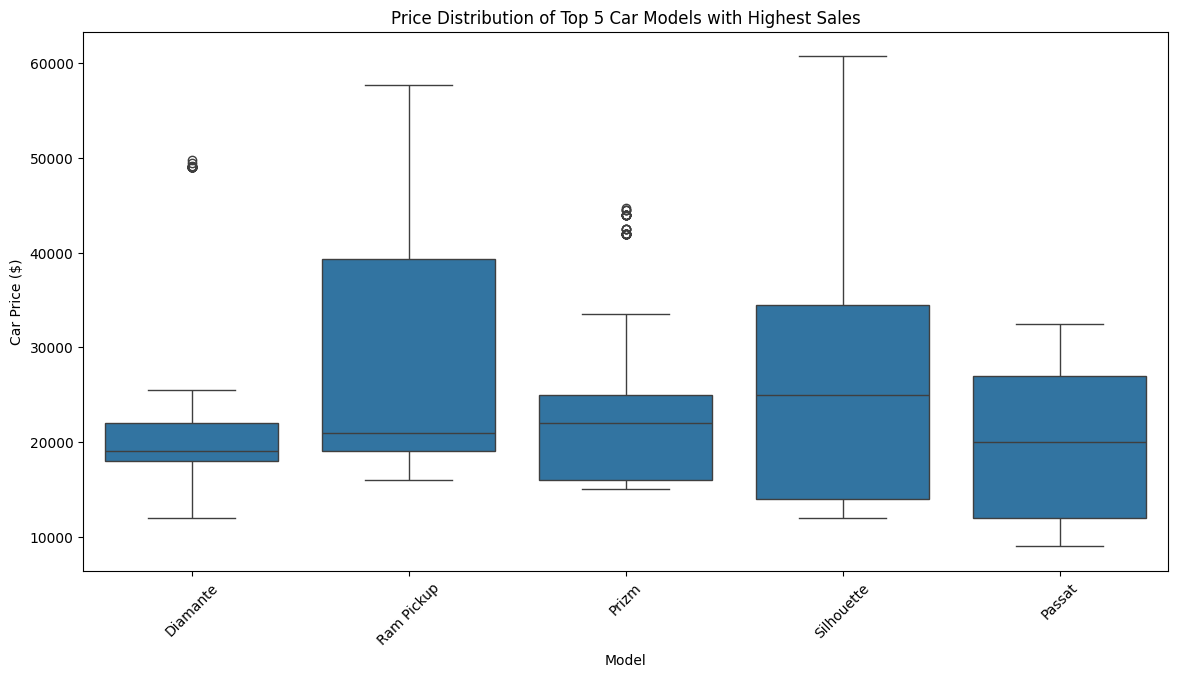

In [ ]:
top_models = df['Model'].value_counts().head(5).index
top_models_data = df[df['Model'].isin(top_models)]

# Display the top 5 car models
print("\nTop 5 car models with the highest number of sales:")
print(df['Model'].value_counts().head(5))

# Visualize the price distribution for the top 5 car models using box plots
plt.figure(figsize=(14, 7))
sns.boxplot(x='Model', y='Price ($)', data=top_models_data)
plt.xlabel('Model')
plt.ylabel('Car Price ($)')
plt.title('Price Distribution of Top 5 Car Models with Highest Sales')
plt.xticks(rotation=45)
plt.show()

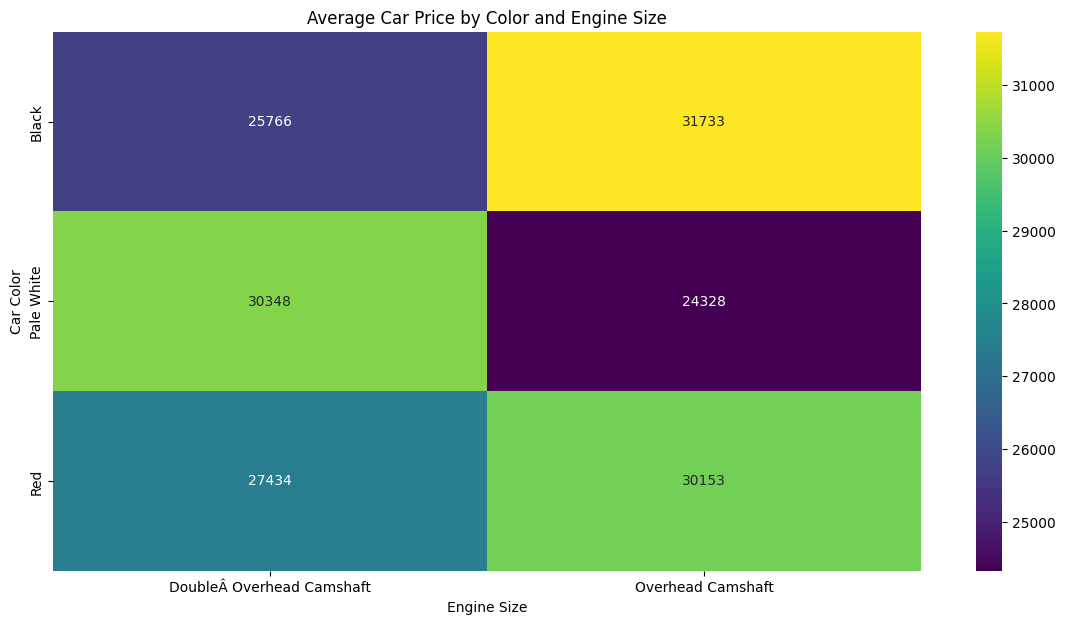

In [ ]:
# 11.) How does car price vary with engine size across different car colors, and which colors have the highest price variation ?
price_variation_by_color_engine = df.groupby(['Color', 'Engine'])['Price ($)'].mean().reset_index()
price_variation_pivot = price_variation_by_color_engine.pivot(index='Color', columns='Engine', values='Price ($)').fillna(0)

# Plotting
plt.figure(figsize=(14, 7))
sns.heatmap(price_variation_pivot, annot=True, cmap='viridis', fmt=".0f")  # Use fmt=".0f" to display integer values
plt.xlabel('Engine Size')
plt.ylabel('Car Color')
plt.title('Average Car Price by Color and Engine Size')
plt.show()

# Calculate price variation for each color
price_variation_by_color = df.groupby('Color')['Price ($)'].std().reset_index()
price_variation_by_color = price_variation_by_color.sort_values('Price ($)', ascending=False)

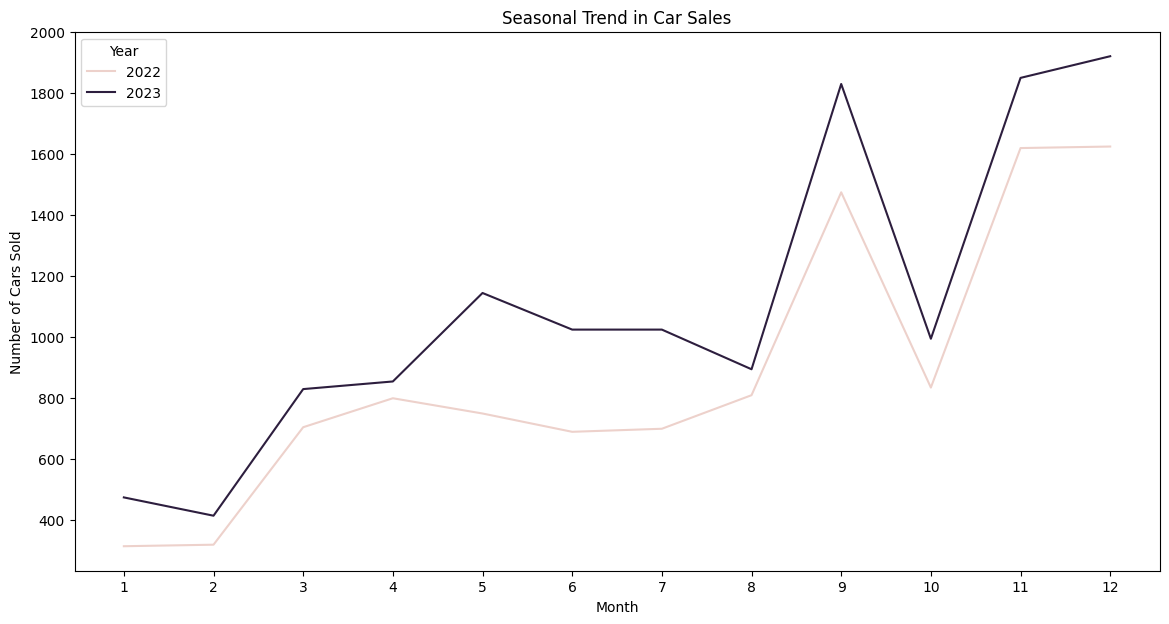

In [ ]:
# 12.) Is there any seasonal trend in car sales based on the date of sale?

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from the 'Date' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group data by month and year, then count sales
monthly_sales = df.groupby(['Year', 'Month'])['Price ($)'].count().reset_index()
monthly_sales.columns = ['Year', 'Month', 'Sales_Count']


# Create a time series plot
plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='Sales_Count', hue='Year', data=monthly_sales)
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.title('Seasonal Trend in Car Sales')
plt.xticks(range(1,13))
plt.show()

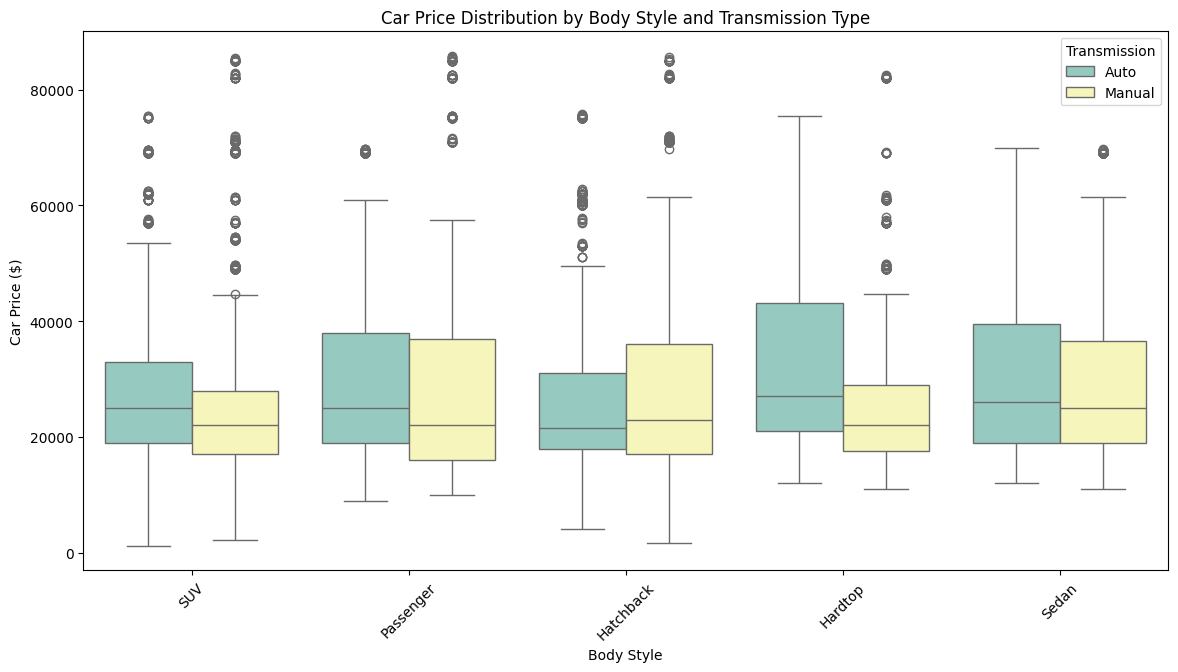

mean   median           std    min    max
Body Style Transmission                                                   
Hardtop    Auto          31520.188210  27000.0  13687.756740  12000  75501
           Manual        27016.943698  22001.0  14072.501848  11000  82500
Hatchback  Auto          25910.544824  21500.0  13144.014337   4200  75700
           Manual        28702.550562  23000.0  16284.049616   1700  85600
Passenger  Auto          28915.835149  25000.0  13946.481932   9000  69801
           Manual        28969.521039  22000.0  18523.684163  10000  85800
SUV        Auto          27501.404407  25000.0  13299.927913   1200  75501
           Manual        26079.019161  22000.0  14621.526541   2200  85500
Sedan      Auto          29955.294344  26000.0  14310.910860  12000  69980
           Manual        29664.271572  25000.0  15440.056434  11000  69700

In [ ]:
# 13.) How does the car price distribution change when considering different combinations of body style and transmission type
# Group data by body style and transmission type and calculate descriptive statistics for price
price_stats_by_body_transmission = df.groupby(['Body Style', 'Transmission'])['Price ($)'].agg(['mean', 'median', 'std', 'min', 'max'])

# Create a box plot to visualize price distributions for each combination
plt.figure(figsize=(14, 7))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df, palette='Set3')
plt.xlabel('Body Style')
plt.ylabel('Car Price ($)')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xticks(rotation=45)
plt.legend(title='Transmission')
plt.show()

price_stats_by_body_transmission

In [ ]:
# 15.) How does the average car price vary across different car models and engine types?

ValueError: could not convert string to float: 'DoubleÂ\xa0Overhead Camshaft'

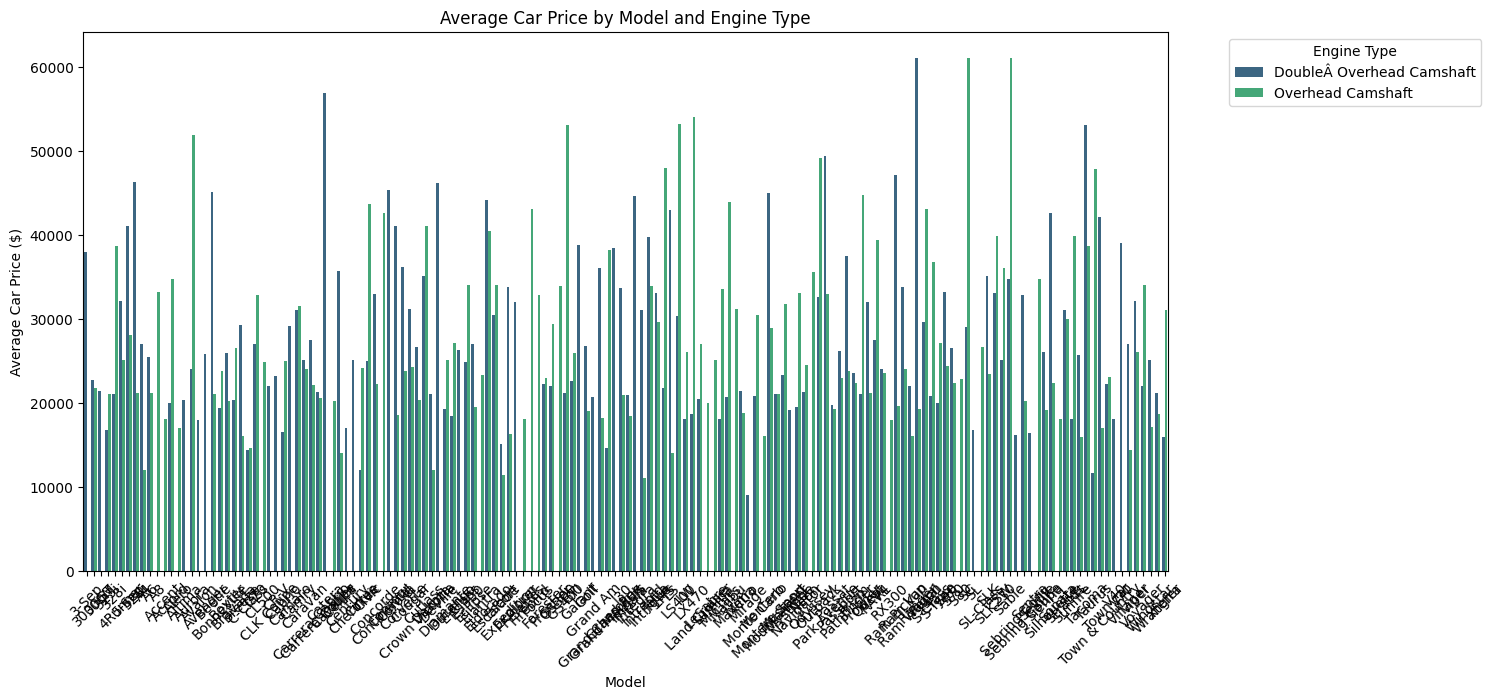

In [ ]:
# 15.) How does the average car price vary across different car models and engine types?
average_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
average_price_by_model_engine.columns = ['Model', 'Engine', 'Average_Price']

plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='Average_Price', hue='Engine', data=average_price_by_model_engine, palette='viridis')
plt.xlabel('Model')
plt.ylabel('Average Car Price ($)')
plt.title('Average Car Price by Model and Engine Type')
plt.xticks(rotation=45)
plt.legend(title='Engine Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



# **Amazon**

In [161]:
am = pd.read_csv("amazon.csv")

In [162]:
# Cleaning the am

# Removing ₹ and commas, converting price columns to numeric
am['discounted_price'] = am['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
am['actual_price'] = am['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Removing % from discount_percentage and converting to numeric
am['discount_percentage'] = am['discount_percentage'].str.replace('%', '').astype(float)

# Converting rating to numeric
am['rating'] = pd.to_numeric(am['rating'], errors='coerce')

# Converting rating_count to numeric (removing commas and handling missing values)
am['rating_count'] = am['rating_count'].str.replace(',', '').astype(float)

# Handling missing values in rating_count by filling with 0
am['rating_count'].fillna(0, inplace=True)

# Splitting category into separate subcategories
am['main_category'] = am['category'].str.split('|').str[0]

# Confirming am cleaning
am.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [163]:
# 1.) What is the average rating for each product category?
am['category'] = am['category'].str.split('|')
am = am.explode('category')

# Convert the 'rating' column to numeric (in case there are any issues)
am['rating'] = pd.to_numeric(am['rating'], errors='coerce')

# Group by 'category' and calculate the average rating using the agg function
average_ratings = am.groupby('category')['rating'].agg(['mean']).reset_index()
average_ratings

,category,mean
0,3DGlasses,3.500000
1,AVReceivers&Amplifiers,4.000000
2,Accessories,4.040541
3,Accessories&Peripherals,4.148556
4,Adapters,4.100000
...,...,...
312,WetGrinders,3.800000
313,WireboundNotebooks,4.400000
314,WirelessUSBAdapters,4.094444
315,WoodenPencils,4.300000


In [164]:
# 2.) What are the top rating_count products by category?
am['category'] = am['category'].str.split('|')
am = am.explode('category')

# Convert the 'rating_count' column to numeric (in case there are any issues)
#The error is occuring because the 'rating_count' column might not be of string type.
#We can first ensure its a string and then replace '.' with empty string and then convert it to numeric using to_numeric
am['rating_count'] = pd.to_numeric(am['rating_count'].astype(str).str.replace('.', ''), errors='coerce')


# Group by 'category' and find the product with the highest 'rating_count' in each category
top_products = am.loc[am.groupby('category')['rating_count'].idxmax()]

# Select relevant columns to display
top_products = top_products[['category', 'product_name', 'rating_count']]
top_products

,category,product_name,rating_count
312,Electronics,Irusu Play VR Plus Virtual Reality Headset wit...,6210
312,"HomeTheater,TV&Video",Irusu Play VR Plus Virtual Reality Headset wit...,6210
312,Accessories,Irusu Play VR Plus Virtual Reality Headset wit...,6210
312,3DGlasses,Irusu Play VR Plus Virtual Reality Headset wit...,6210
268,Electronics,Cubetek 3 in 1 LCD Display V5.0 Bluetooth Tran...,8970
...,...,...,...
854,WoodenPencils,Apsara Platinum Pencils Value Pack - Pack of 20,50360
1335,Home&Kitchen,"AGARO Classic Portable Yogurt Maker, 1.2L Capa...",5570
1335,Kitchen&HomeAppliances,"AGARO Classic Portable Yogurt Maker, 1.2L Capa...",5570
1335,SmallKitchenAppliances,"AGARO Classic Portable Yogurt Maker, 1.2L Capa...",5570


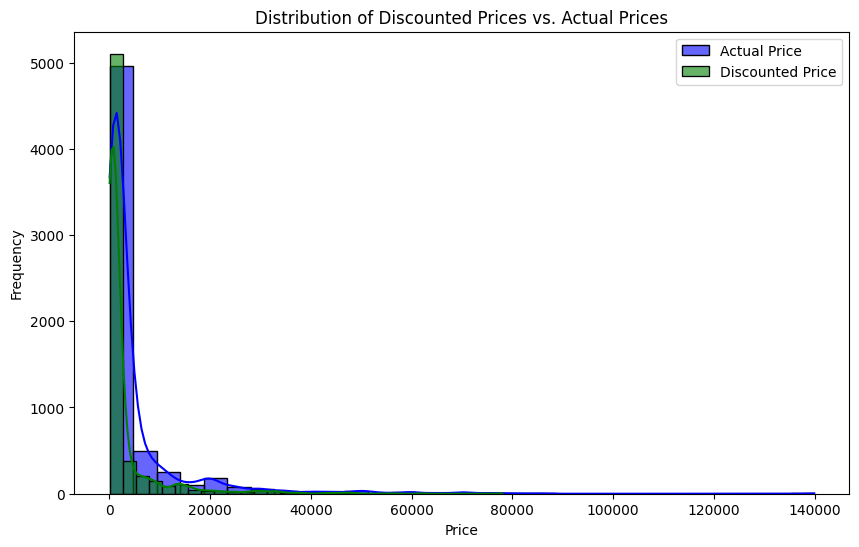

In [169]:
# 3.)  What is the distribution of discounted prices vs. actual prices?
# Plotting the distribution of actual and discounted prices
plt.figure(figsize=(10, 6))
sns.histplot(am['actual_price'], bins=30, label='Actual Price', color='blue', kde=True, alpha=0.6)
sns.histplot(am['discounted_price'], bins=30, label='Discounted Price', color='green', kde=True, alpha=0.6)
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [167]:
# 4.) How does the average discount percentage vary across categories?

# Grouping the data by main category and calculating the average discount percentage
average_discount_by_category = data.groupby('main_category')['discount_percentage'].mean().sort_values(ascending=False)

# Resetting the index and renaming columns for better readability
average_discount_by_category = average_discount_by_category.reset_index()
average_discount_by_category.columns = ['Category', 'Average Discount (%)']

# Displaying the results
print("Average Discount Percentage by Category:")
average_discount_by_category


In [171]:
# Question 5.) What are the most popular product names?
# Sorting products by rating_count in descending order to find the most popular products
most_popular_products = (
    am[['product_name', 'rating_count']]
    .sort_values(by='rating_count', ascending=False)
    .head(10)
)

# Displaying the results
print("Most Popular Product Names:")
most_popular_products


Most Popular Product Names:


,product_name,rating_count
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,4269730
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",4269730
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",4269730
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",4269730
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",4269730
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",4269730
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",4269730
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",4269730
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",4269730
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",4269730


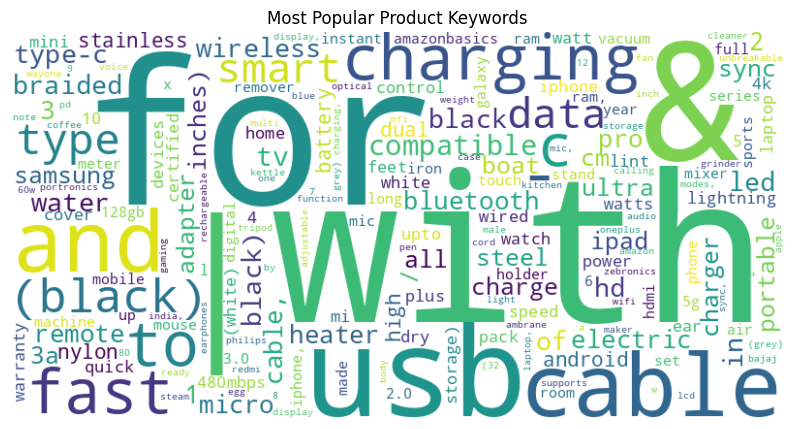

Top Product Keywords:
    Keyword  Frequency
0      with       3162
1       for       2970
2         &       1889
3         |       1858
4       usb       1738
5     cable       1557
6       and       1456
7  charging       1077
8        to       1031
9      fast       1029


In [173]:
# 6.) What are the most popular product keywords?


from collections import Counter
from wordcloud import WordCloud

# Tokenizing words in product names and counting occurrences
keywords = ' '.join(am['product_name'].str.lower())
word_count = Counter(keywords.split())

# Generating a word cloud for visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count)

# Displaying the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Popular Product Keywords')
plt.show()

# Displaying top 10 keywords
top_keywords = pd.DataFrame(word_count.most_common(10), columns=['Keyword', 'Frequency'])
print("Top Product Keywords:")
print(top_keywords)


In [174]:
# 7.) What are the most popular product reviews?
# Identifying the products with the highest number of reviews
most_popular_reviews = am[['product_name', 'review_title', 'rating_count']].sort_values(by='rating_count', ascending=False).head(10)

# Displaying the results
print("Most Popular Product Reviews:")
most_popular_reviews



Most Popular Product Reviews:


,product_name,review_title,rating_count
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,"It's quite good and value for money,Works well...",4269730
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","It's quite good and value for money,Works well...",4269730
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","It's quite good and value for money,Works well...",4269730
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","It's quite good and value for money,Works well...",4269730
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","It's quite good and value for money,Works well...",4269730
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","It's quite good and value for money,Works well...",4269730
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","It's quite good and value for money,Works well...",4269730
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","It's quite good and value for money,Works well...",4269730
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","It's quite good and value for money,Works well...",4269730
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","It's quite good and value for money,Works well...",4269730


In [178]:
# 8.)  What is the correlation between discounted_price and rating?
# Identifying the products with the highest number of reviews
most_popular_reviews = am[['product_name', 'review_title', 'rating_count']].sort_values(by='rating_count', ascending=False).head(10)

# Displaying the results
print("Most Popular Product Reviews:")
most_popular_reviews



Most Popular Product Reviews:


,product_name,review_title,rating_count
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,"It's quite good and value for money,Works well...",4269730
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","It's quite good and value for money,Works well...",4269730
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","It's quite good and value for money,Works well...",4269730
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","It's quite good and value for money,Works well...",4269730
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","It's quite good and value for money,Works well...",4269730
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","It's quite good and value for money,Works well...",4269730
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","It's quite good and value for money,Works well...",4269730
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","It's quite good and value for money,Works well...",4269730
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","It's quite good and value for money,Works well...",4269730
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","It's quite good and value for money,Works well...",4269730


In [179]:
# 9.) What are the Top 5 categories based on the highest ratings?
# Sorting categories by average rating in descending order
top_categories_by_rating = am.groupby('main_category')['rating'].mean().sort_values(ascending=False).head(5)

# Resetting the index and renaming columns for better readability
top_categories_by_rating = top_categories_by_rating.reset_index()
top_categories_by_rating.columns = ['Category', 'Average Rating']

# Displaying the results
print("Top 5 Categories Based on Highest Ratings:")
top_categories_by_rating


Top 5 Categories Based on Highest Ratings:


,Category,Average Rating
0,Toys&Games,4.300000
1,OfficeProducts,4.297340
2,HomeImprovement,4.250000
3,Computers&Accessories,4.153655
4,Electronics,4.087192


In [180]:
# 10. Identify any potential areas for improvement or optimization based on the data analysis


In [181]:
# Insights based on previous analyses:
# 1. Categories with low ratings may need improvement in product quality.
low_rated_categories = am.groupby('main_category')['rating'].mean().sort_values().head(5)
print("Categories with Lowest Average Ratings:")
print(low_rated_categories)

# 2. Products with high actual prices and low discounts could be optimized for better sales.
high_price_low_discount = am[(am['actual_price'] > am['actual_price'].median()) &
                               (am['discount_percentage'] < am['discount_percentage'].median())]
print("High Price and Low Discount Products:")
high_price_low_discount[['product_name', 'actual_price', 'discount_percentage']].head(10)


Categories with Lowest Average Ratings:
main_category
Car&Motorbike          3.800000
MusicalInstruments     3.900000
Health&PersonalCare    4.000000
Home&Kitchen           4.044439
Electronics            4.087192
Name: rating, dtype: float64
High Price and Low Discount Products:


,product_name,actual_price,discount_percentage
16,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,24999.0,44.0
16,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,24999.0,44.0
16,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,24999.0,44.0
16,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,24999.0,44.0
19,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,21990.0,39.0
19,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,21990.0,39.0
19,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,21990.0,39.0
19,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,21990.0,39.0
20,Duracell USB Lightning Apple Certified (Mfi) B...,1799.0,46.0
20,Duracell USB Lightning Apple Certified (Mfi) B...,1799.0,46.0


# **Spotify**

**EDA-4 Assignment**

The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape. Each entry not only highlights the popularity and musical composition of the tracks but also underscores the creative prowess of the artists and their profound impact on global listeners.


In [185]:
##IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot') # Use stylesheet for plots
#plt.style.use('fivethirtyeight')
#pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', None)

%matplotlib inline

spotify_data = pd.read_csv("spotify_data.csv")

In [186]:
# Display the first few rows of the DataFrame
spotify_data.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [187]:
# Initial inspection
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


**Questions with Solutions**

1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

In [188]:
# Checking for null values
null_values = spotify_data.isnull().sum()

# Checking for duplicate rows
duplicate_rows = spotify_data.duplicated().sum()

# Removing duplicates if any
if duplicate_rows > 0:
    spotify_data = spotify_data.drop_duplicates()

print("Null Values per Column:\n", null_values)
print(f"Number of Duplicate Rows: {duplicate_rows}")


Null Values per Column:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of Duplicate Rows: 27


2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

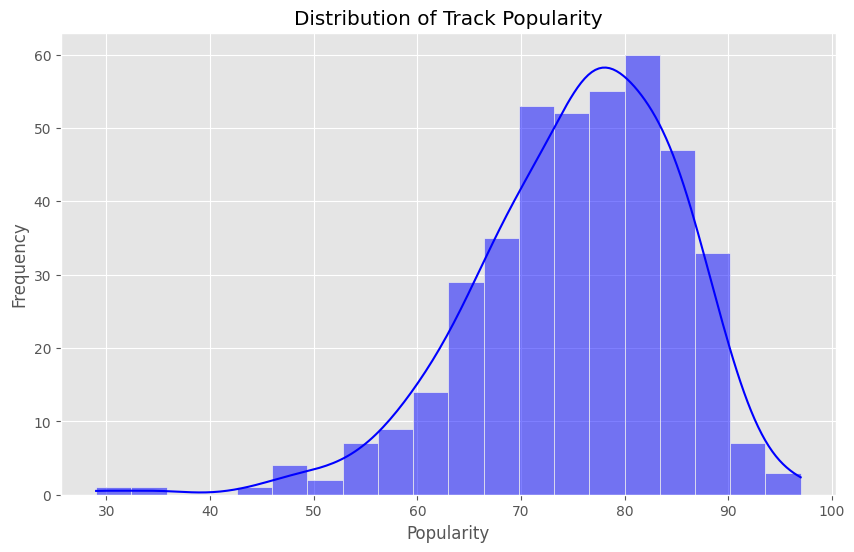

In [189]:
# Plotting the distribution of popularity
plt.figure(figsize=(10, 6))
sns.histplot(spotify_data['Popularity'], bins=20, kde=True, color='blue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

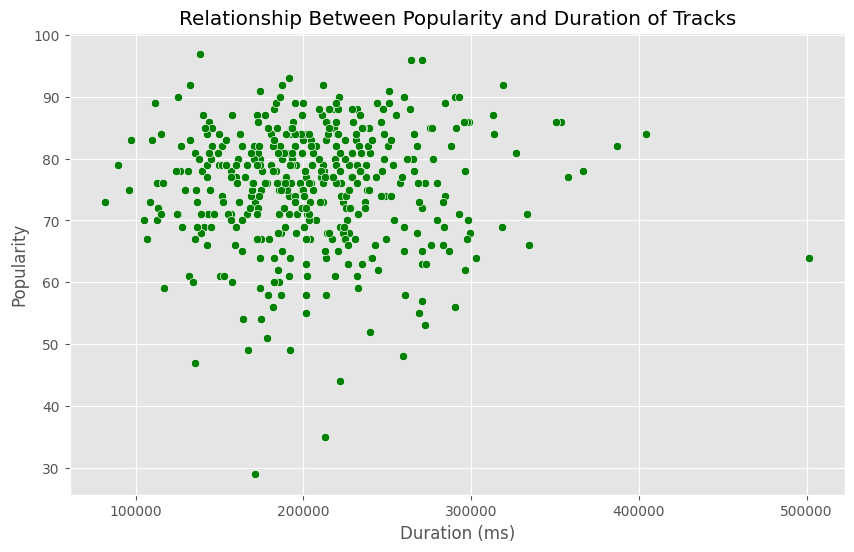

In [190]:
# Scatter plot for popularity vs duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x=spotify_data['Duration (ms)'], y=spotify_data['Popularity'], color='green')
plt.title('Relationship Between Popularity and Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()


4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

In [ ]:
# Count of tracks per artist
top_artists = spotify_data['Artist'].value_counts()

# Plotting the top 10 artists with the most tracks
plt.figure(figsize=(12, 6))
sns.countplot(y=spotify_data['Artist'],
              order=spotify_data['Artist'].value_counts().head(10).index,
              palette='viridis')
plt.title('Top 10 Artists with the Most Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

# Displaying the artist with the highest number of tracks
most_tracks_artist = top_artists.idxmax()
most_tracks_count = top_artists.max()
print(f"Artist with Most Tracks: {most_tracks_artist} ({most_tracks_count} tracks)")


5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [ ]:
# Finding the 5 least popular tracks
least_popular_tracks = spotify_data.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 Least Popular Tracks:\n", least_popular_tracks)


6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

In [ ]:
# Top 5 artists by track count
top_5_artists = spotify_data['Artist'].value_counts().head(5).index

# Calculate average popularity for each of the top 5 artists
average_popularity_top_artists = (
    spotify_data[spotify_data['Artist'].isin(top_5_artists)]
    .groupby('Artist')['Popularity']
    .mean()
    .sort_values(ascending=False)
)

print("Average Popularity for Top 5 Most Popular Artists:\n", average_popularity_top_artists)


7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.


In [ ]:
# Finding the most popular track for each of the top 5 artists
most_popular_tracks_top_artists = (
    spotify_data[spotify_data['Artist'].isin(top_5_artists)]
    .sort_values(by=['Artist', 'Popularity'], ascending=[True, False])
    .groupby('Artist')
    .first()
)[['Track Name', 'Popularity']]

print("Most Popular Tracks for Top 5 Artists:\n", most_popular_tracks_top_artists)


8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.

In [ ]:
# Pair plot for numerical variables
sns.pairplot(spotify_data[['Popularity', 'Duration (ms)']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.


In [ ]:
# Box plot for track duration across top 10 artists
top_10_artists = spotify_data['Artist'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)',
            data=spotify_data[spotify_data['Artist'].isin(top_10_artists)],
            palette='Set3')
plt.title('Variation of Track Duration Across Top Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45)
plt.show()


10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

In [ ]:
# Swarm plot for popularity distribution across top 10 artists
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity',
               data=spotify_data[spotify_data['Artist'].isin(top_10_artists)],
               inner='quartile', palette='muted')
plt.title('Popularity Distribution Across Top Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()
